In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [3]:
df_train_original = pd.read_csv('train.csv')
df_validation_original = pd.read_csv('validation.csv')
df_test_original = pd.read_csv('test.csv')

In [20]:
def pandasBarPlot(data,columnName,xlabel):
    draw = pd.DataFrame(np.array(data))
    plt.figure
    draw.plot.bar(legend=False,x = xlabel)
    plt.ylabel('CTR '+columnName)
def plotTrainingCTR(columeName):
    dataDict = {}    
    dataDict[columeName]= getUnique(columeName)
    dataDict[columeName].sort()
    dataDict[columeName+'CTR']=  getCTR(columeName,dataDict[columeName])
    pandasBarPlot(dataDict[columeName+'CTR'],columeName,dataDict[columeName]) 

In [16]:
# split os and browser
def split_useragent_os(data):
    return data.split('_')[0]
def split_useragent_b(data):
    return data.split('_')[1]
def split_useragent(dataframe):
    dataframe['os'] = dataframe['useragent'].apply(split_useragent_os)
    dataframe['browser'] = dataframe['useragent'].apply(split_useragent_b)
    dataframe.drop(['useragent'], axis=1, inplace=True)

In [17]:
split_useragent(df_train_original)

In [4]:
def getUnique(name):
    return df_train_original[name].unique()
def getClickSubdata(data,value):
    return data[data["click"]==value]
def getSubdata(data,column,value):
    return data[data[column]==value]

In [6]:
def pandasDistributionPlot(data,columnName,xlabel):
    draw = pd.DataFrame(np.array(data))
    plt.figure
    draw.plot.bar(legend=False,x = xlabel)
    plt.ylabel('Distribution for  '+columnName)
def DistributionColumn(col,data = df_train_original):
    summary = pd.value_counts(data[col],sort = True)
    l = data[col].unique()
    l.sort()
    data = []
    for v in l:
        #print(summary[v])
        data.append(summary[v])
    pandasDistributionPlot(data,col,l)
def getCTR(columnName,valuelist):
    alist =[]
    for v in valuelist:
        subset = df_train_original[df_train_original[columnName] ==v]
        summary = pd.value_counts(subset['click'].values, sort=False)
        if len(summary.keys())==2:
            CTR = summary[np.int(1)]/(summary[np.int(1)]+summary[np.int(0)])
        elif np.int(1) in summary.keys():
            CTR = 1
        else :
            CTR = 0
        alist.append(CTR)
        #print(CTR)
    return alist

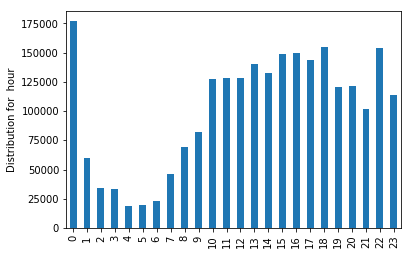

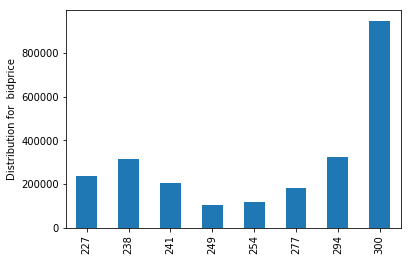

In [8]:
for col in ['hour','bidprice']:
    DistributionColumn(col)

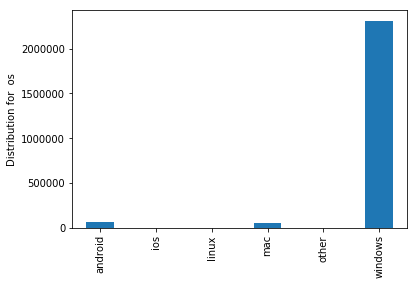

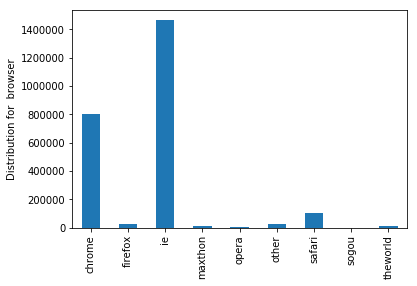

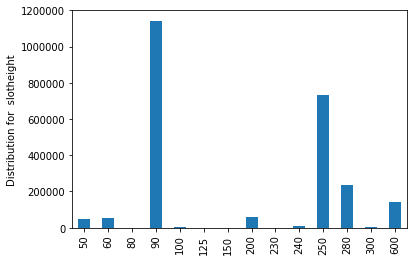

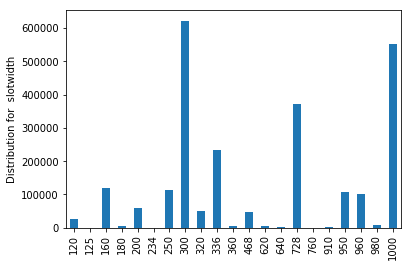

In [18]:
for col in ['os','browser','slotheight','slotwidth']:
    DistributionColumn(col)

In [9]:
table = pd.DataFrame(getUnique('advertiser'),columns = ['advertiser'])
impression =pd.value_counts(df_train_original['advertiser'].values, sort=False)
dropedData = df_train_original[['click','payprice','advertiser']]
#df_train_original.drop(col_to_drop1,axis=1)
summaryDF = dropedData.groupby('advertiser')
summaryDF = summaryDF.sum()
summaryDF = summaryDF.rename(columns={'payprice':'cost'})
summaryDF['cost'] = summaryDF['cost']/1000

In [11]:
for adv in getUnique('advertiser'):
    #print(adv,type)
    summaryDF.loc[np.int(adv),'impression'] = impression[adv]
    summaryDF.loc[np.int(adv),'CTR'] = float(summaryDF.loc[np.int(adv),'click'])/impression[adv]
    summaryDF.loc[np.int(adv),'eCPC'] = float(summaryDF.loc[np.int(adv),'cost'])/float(summaryDF.loc[np.int(adv),'click'])
    summaryDF.loc[np.int(adv),'CPM'] = float(summaryDF.loc[np.int(adv),'cost'])/float(summaryDF.loc[np.int(adv),'impression'])*1000
summaryDF

,click,cost,impression,CTR,eCPC,CPM
advertiser,,,,,,
1458,385,33968.736,492353.0,0.000782,88.230483,68.992646
2259,43,12428.238,133673.0,0.000322,289.028791,92.974931
2261,36,9873.779,110122.0,0.000327,274.271639,89.662184
2821,131,18828.044,211366.0,0.000620,143.725527,89.077922
2997,217,3129.267,49829.0,0.004355,14.420585,62.800116
3358,202,22447.231,264956.0,0.000762,111.124906,84.720599
3386,320,34931.823,455041.0,0.000703,109.161947,76.766320
3427,272,30458.711,402806.0,0.000675,111.980555,75.616329
3476,187,23918.779,310835.0,0.000602,127.907909,76.950083


In [12]:
overall = dropedData.sum()
overall['payprice'] = overall['payprice']
overall['impression'] = len( df_train_original["click"].values)
overall['CTR'] = overall['click']/overall['impression']
overall['eCPC'] = overall['payprice'] /overall['click'] 
overall['CPM'] = overall['payprice']/overall['impression']*1000
overall = overall.drop(['advertiser'])
print(overall)

click         1.793000e+03
payprice      1.899846e+08
impression    2.430981e+06
CTR           7.375623e-04
eCPC          1.059591e+05
CPM           7.815142e+04
dtype: float64


In [13]:
pd.DataFrame(overall)

,0
click,1.793000e+03
payprice,1.899846e+08
impression,2.430981e+06
CTR,7.375623e-04
eCPC,1.059591e+05
CPM,7.815142e+04


In [14]:
citys = df_train_original['city'].unique()
hours = df_train_original['hour'].unique()
region =  df_train_original['region'].unique()
#useragent =df_train_original['useragent'].unique()
advs = df_train_original['advertiser'].unique()
adex = df_train_original['adexchange'].unique()
clicked = df_train_original['click'].unique()


print('citys ',len(citys))
print('region',len(region))
#print('useragent',len(useragent))
print('advs',len(advs))
print('adex',len(adex))
print('clicked',len(clicked),clicked)


citys  370
region 35
advs 9
adex 5
clicked 2 [0 1]


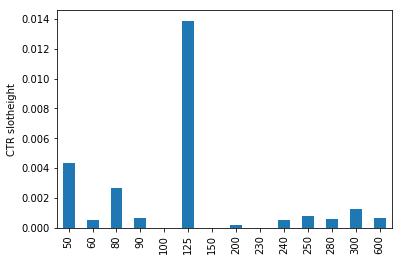

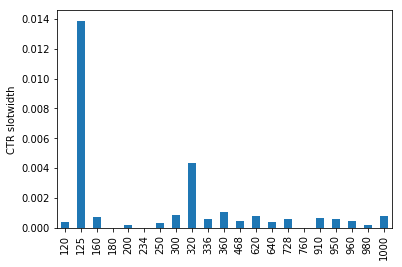

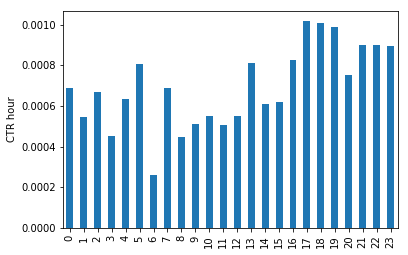

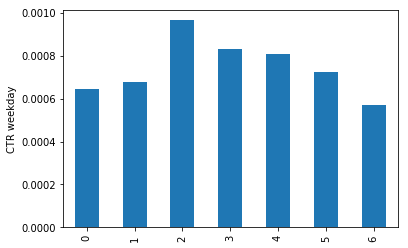

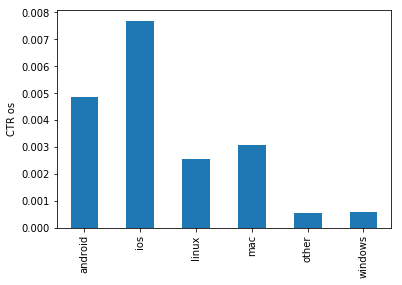

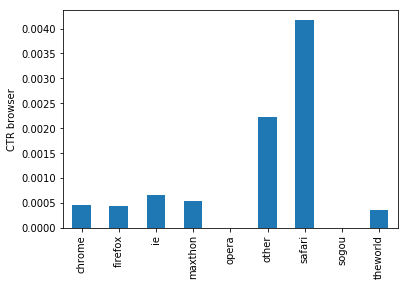

In [21]:
plotTrainingCTR('slotheight')
plotTrainingCTR('slotwidth')
plotTrainingCTR('hour')
plotTrainingCTR('weekday')
plotTrainingCTR('os')
plotTrainingCTR('browser')

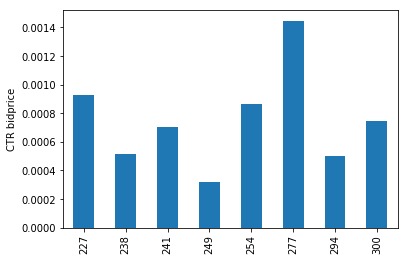

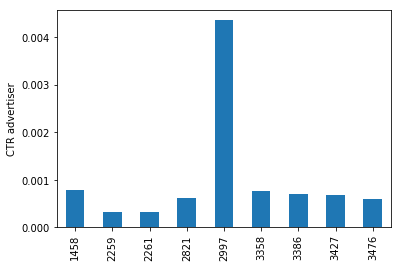

In [22]:
for c in ['bidprice','advertiser']:
    plotTrainingCTR(c)

In [23]:
def priceSummary(dataSource):
    Columns =['bidprice','payprice']
    source = ['train','validation']
    dataDict ={}
    for s in source :
        dataDict[s] ={}
        if s=='train':
            dataframe = dataSource[0]
        else:
            dataframe = dataSource[1]
        for c in Columns:
            dataDict[s][c] = dataframe[c].mean()
    return dataDict
            

In [24]:
summary = priceSummary([df_train_original,df_validation_original])
for d in summary.keys():
    print(d)
    print(summary[d])

train
{'bidprice': 272.9620461862927, 'payprice': 78.15141623895867}
validation
{'bidprice': 273.0530986263058, 'payprice': 78.23400509994242}


In [25]:
def priceSummary2(dataSource):
    Columns =['bidprice','payprice']
    source = ['train','validation']
    dataDict ={}
    for s in source :
        dataDict[s] ={}
        if s=='train':
            dataframe = dataSource[0]
        else:
            dataframe = dataSource[1]
        for c in Columns:
            dataDict[s][c] = {}
            for click in [0,1]:
                click_dataframe =dataframe[dataframe['click']==click]
                dataDict[s][c][click]  = click_dataframe[c].mean()
    return dataDict

In [26]:
summary2 = priceSummary2([df_train_original,df_validation_original])
for d in summary2.keys():
    print(d)
    for price in summary2[d].keys():
        print(price)
        print(summary2[d][price])

train
bidprice
{0: 272.96185062662914, 1: 273.2269938650307}
payprice
{0: 78.1312566174376, 1: 105.46402677077523}
validation
bidprice
{0: 273.05251824853565, 1: 273.9257425742574}
payprice
{0: 78.21572617154446, 1: 105.71782178217822}
